In [10]:
import tensorflow as tf
#Keras est une bibliothèque Python de haut niveau pour créer des réseaux de neurones.
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

#géré automatiquement par la fonction load_data() de keras.datasets.fashion_mnist.
(train_images , train_labels) , (test_images , test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_labels[0])

#to shrink out our data : images pixels are between 0 255 we dvide by 255
train_images = train_images/255.0
test_images = test_images/255.0


9


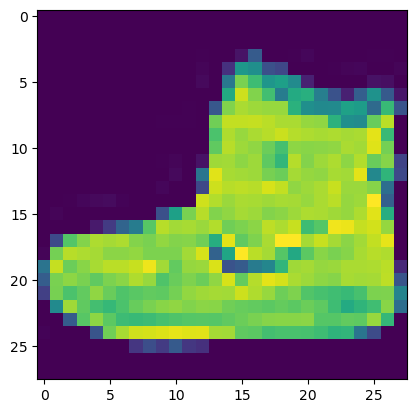

In [6]:
# to show images using matplotlib (image)
plt.imshow( train_images[0] )
plt.show() 

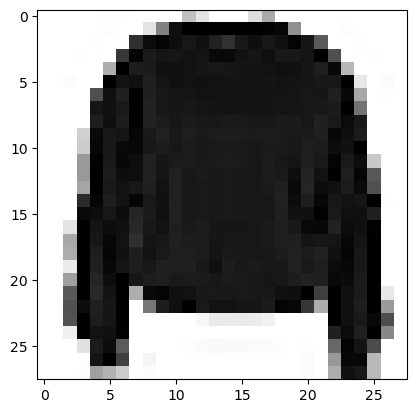

In [7]:
# to see the image properly 
plt.imshow(train_images[7] , cmap=plt.cm.binary)
plt.show()


In [8]:
# what are images actually looks like: array of 28;28 pixels like rgb values [0;255]
print(train_images[7])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

In [ ]:
# we won't pass an array 28x28 to our neuron : we can change this info to a way that we can give it to the neuron
# we will flatten our array of 28x28 to a 1d arr of 28x28=784 elem
# so we will have 784 neurone in input layer for each one a value
# our output layer will be 10 layers each one for a label and the one with greatest probability 0.9 is the one



In [13]:
# our model 
# defining our layers
# dense layer = fully connected layer
# activation function : rectify linear unit
# softmax transforme les 10 scores en probabilités (somme = 1).
# sequencial is like a sequence of layers
model = keras.Sequential([
    keras.Input(shape=(28, 28)),  # Définir la forme d'entrée correctement
    keras.layers.Flatten(),       # Aplatir l'image 28x28 en un vecteur de 784
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
    
# set parametres for our model
#choix de l'optimiseur, de la fonction de perte et de la métrique
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy" , metrics=["accuracy"] )

# train model
# epochs means how many times the model will see the informations (train_images , train_labels)

model.fit(train_images , train_labels , epochs=5 ) 

# to see the test loss and the test accuracy 

test_loss , test_acc = model.evaluate(test_images , test_labels)

print("Test accuracy : " , test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7758 - loss: 0.6421
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8614 - loss: 0.3863
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8756 - loss: 0.3396
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8854 - loss: 0.3115
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8938 - loss: 0.2920
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 0.3610
Test accuracy :  0.8677999973297119


In [21]:
# using the model for predictions
# method predict()
#accepts a list [] or np.array()
# predict_7 = model.predict([test_images[7]])

prediction = model.predict(test_images)
# print(prediction)

#we got a list of lists of 10 values (output layer) difficult to know the greater value
#each list is the prediction of an enregitrement of test_images
# we search the index of biggest nbr and pass it to the class_names

print(class_names[np.argmax(prediction[0])])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Ankle boot


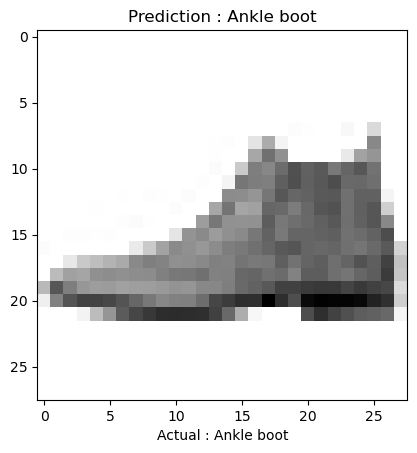

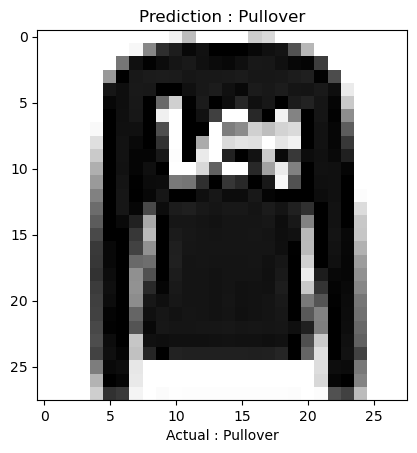

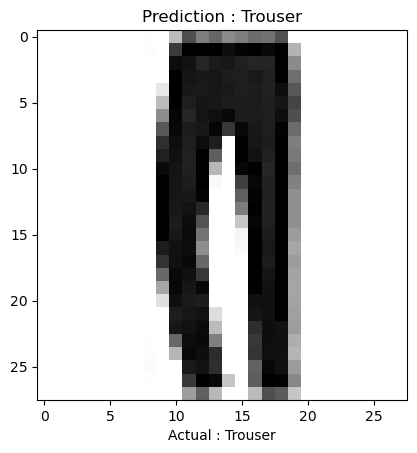

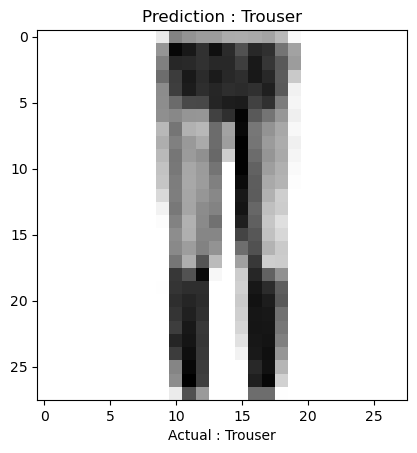

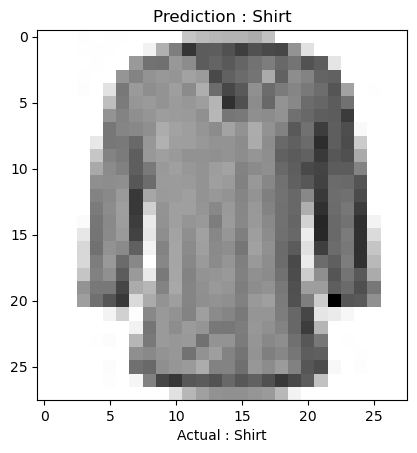

In [20]:
# to confirm the prediction 
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel("Actual : " + class_names[test_labels[i]])
    plt.title("Prediction : " + class_names[np.argmax(prediction[i])] )
    plt.show()

In [9]:
# Vérifie l'environnement Python dans lequel tourne Jupyter
import sys
print(sys.executable)


C:\Users\user\anaconda3\python.exe
